In [1]:
%pylab inline
import json
import math
import string
import numpy as np
import pandas as pd
import scipy.stats as stats
from suffix_tree import SuffixTree
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

Populating the interactive namespace from numpy and matplotlib


In [ ]:
num2alpha = dict(zip(range(0, 26), string.ascii_lowercase))
alpha2num = dict(zip(string.ascii_lowercase, range(0, 26)))
num2alpha_col = dict(zip(range(0, len(string.ascii_letters)), string.ascii_letters))
alpha2num_col = dict(zip(string.ascii_letters, range(0, len(string.ascii_letters))))

In [2]:
path = './'
filename = path + 'cos_filtered.pkl'

In [3]:
import pickle
col_clustering_file = open(filename, 'r')
col_clustering = pickle.load(col_clustering_file)
col_clustering_file.close()

In [314]:
n_clusters = len(set(col_clustering.__dict__['labels_']))
sizes, _ = np.histogram(col_clustering.__dict__['labels_'], bins=range(0, n_clusters+1))

In [315]:
sizes[44]

15071

In [316]:
customers_cluster = [15822, 26043, 12253, 4601, 18468, 5446, 10657, 4464, 4573, 4535,
                     3476, 3452, 5202, 4626, 20158, 4382, 3801, 3304, 4230, 17184,
                     5870, 19561, 3070, 3166, 18373, 18918, 4225, 3574, 15727, 80445,
                     3230, 19127, 2914, 1362, 1136, 2609, 8825, 2803, 11722, 3028, 5063,
                     5385, 5855, 14423, 14469]

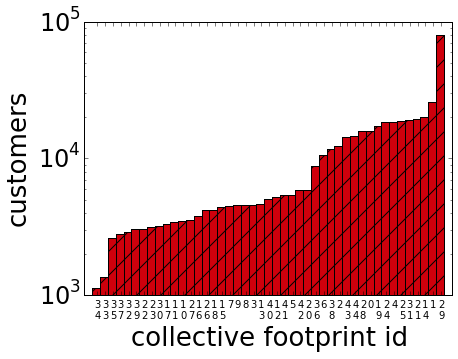

In [392]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

sizes_dict = {k: v for k,v in enumerate(customers_cluster)}

x = 0
labels = list()
for y in sorted(sizes_dict, key=sizes_dict.get, reverse=False):
    plt.bar(x, sizes_dict[y], color='#ce000c', hatch='/', width=1.0)
    x += 1
    labels.append(y)

plt.ylabel('customers', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
labels_vert = list()
for l in labels:
    if len(str(l)) == 1:
        labels_vert.append(str(l))
    else:
        labels_vert.append('%s\n%s' % (str(l)[0], str(l)[1]))
plt.xticks(np.arange(0, len(labels))+0.65, labels_vert, rotation=0, fontsize=10)
plt.xlabel('collective footprint id', fontsize=26)
plt.xlim([-1, len(labels) + 1])
plt.yscale('log')

path_plot = './'
plt.savefig(path_plot + 'col_clust_nbr_cust.png', format='png', bbox_inches='tight')

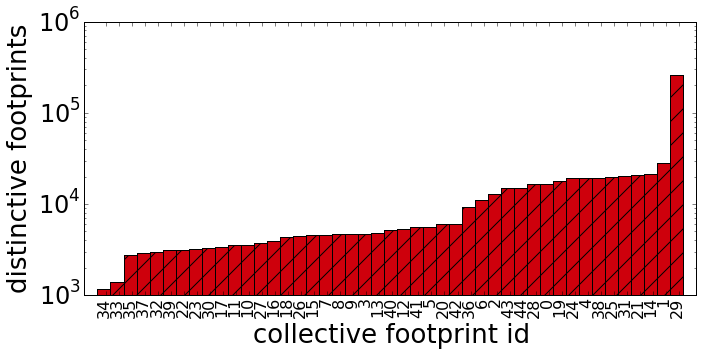

In [393]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

sizes_dict = {k: v for k,v in enumerate(sizes)}

x = 0
labels = list()
for y in sorted(sizes_dict, key=sizes_dict.get, reverse=False):
    plt.bar(x, sizes_dict[y], color='#ce000c', hatch='/', width=1.0)
    x += 1
    labels.append(y)

plt.ylabel('distinctive footprints', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
labels_vert = list()
for l in labels:
    #if len(str(l)) == 1:
    #    labels_vert.append(str(l))
    #else:
    #    labels_vert.append('%s\n%s' % (str(l)[0], str(l)[1]))
    labels_vert.append(str(l))
plt.xticks(np.arange(0, len(labels))+0.65, labels_vert, rotation=90, fontsize=16)
plt.xlabel('collective footprint id', fontsize=26)
plt.xlim([-1, len(labels) + 1])
plt.yscale('log')

path_plot = './'
plt.savefig(path_plot + 'col_clust_nbr_df.png', format='png', bbox_inches='tight')

In [44]:
np.min(col_clustering.__dict__['cluster_centers_'])

0.054687104903038408

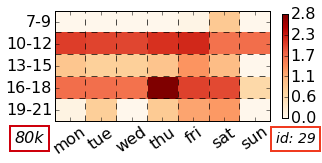

In [374]:
for i in range(29, 30):
    cluster_id = i
    center = col_clustering.__dict__['cluster_centers_'][cluster_id]
    nfootprints = sizes[cluster_id]
    ncustomers = customers_cluster[cluster_id]

    fig, ax = plt.subplots(figsize=(4, 2))
    plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

    min_val = np.min(col_clustering.__dict__['cluster_centers_'])
    max_val = np.max(col_clustering.__dict__['cluster_centers_'])

    distinctive = np.zeros((5,7))
    distinctive_labels = np.zeros((5,7))
    for k in range(0, 35):
        i = k / 5
        j = k % 5
        #print k, i, j
        val = center[k]
        val = math.log(val)
        distinctive[j][i] = val
        distinctive_labels[j][i] = center[k]

    #heatmap = plt.imshow(distinctive, vmin=min_val, vmax=max_val, interpolation='nearest', cmap=plt.cm.OrRd)
    heatmap = plt.imshow(distinctive, vmin=0, interpolation='nearest', cmap=plt.cm.OrRd)
    #heatmap = plt.pcolor(distinctive, cmap=plt.cm.OrRd) 
    cbar = plt.colorbar(heatmap, shrink=0.95, pad=0.05, fraction=0.07, orientation='vertical',
                        ticks=np.arange(0, np.max(distinctive) + np.max(distinctive) / 5.0, np.max(distinctive) / 5.0),
                        format='%d')
    cbar.ax.tick_params(labelsize=16) 

    cbar.ax.set_yticklabels(['%.1f' % v for v in np.arange(0, np.max(distinctive_labels) + np.max(distinctive_labels) / 5.0, 
                                                           np.max(distinctive_labels) / 5.0)])

    plt.yticks(np.arange(0,np.shape(distinctive)[0]), ['7-9', '10-12', '13-15','16-18','19-21'],fontsize=16)
    plt.xticks(np.arange(0,np.shape(distinctive)[1]), 
               ['mon', 'tue', 'wed', 'thu','fri', 'sat','sun'],fontsize=16, rotation=35)
    
    #plt.yticks([])
    #plt.xticks([])
    #cbar.ax.set_yticklabels([])

    for xmaj in ax.xaxis.get_majorticklocs():
        plt.axvline(x=xmaj + 0.5, ls='--',  c='k', linewidth=0.7)

    for i, ymaj in enumerate(ax.yaxis.get_majorticklocs()):
        if i==4:
            continue
        plt.axhline(y=ymaj + 0.44, ls='--',  c='k', linewidth=0.7)

    plt.axis("tight")

    ax.text(-1.8, 5.5, '%dk' % (ncustomers/1000.0), style='italic', fontsize=16,
            bbox={'facecolor': 'w', 'edgecolor':'#ce000c', 'pad':10, 'linewidth':2})
    
    ax.text(6.7, 5.5, 'id: %d' % cluster_id, style='italic', fontsize=14,
            bbox={'facecolor': 'w', 'edgecolor':'#f03b20', 'pad':10, 'linewidth':2})

    path_plot = './'
    plt.savefig(path_plot + 'col_clust_cf%d.png' % cluster_id, format='png', bbox_inches='tight')

(-0.5, 6.5, 4.5, -0.5)

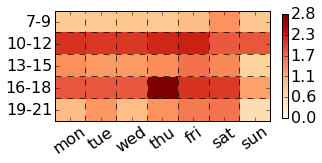

In [217]:
cluster_id = 29
center = col_clustering.__dict__['cluster_centers_'][cluster_id]
nfootprints = sizes[cluster_id]
ncustomers = customers_cluster[cluster_id]

fig, ax = plt.subplots(figsize=(4, 2))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

min_val = np.min(col_clustering.__dict__['cluster_centers_'])
max_val = np.max(col_clustering.__dict__['cluster_centers_'])

distinctive = np.zeros((5,7))
distinctive_labels = np.zeros((5,7))
for k in range(0, 35):
    i = k / 5
    j = k % 5
    #print k, i, j
    val = center[k]
    #val = math.log(val)
    distinctive[j][i] = val
    distinctive_labels[j][i] = center[k]

heatmap = plt.imshow(distinctive, vmin=0, interpolation='nearest', cmap=plt.cm.OrRd)
#heatmap = plt.pcolor(distinctive, cmap=plt.cm.OrRd) 
cbar = plt.colorbar(heatmap, shrink=0.95, pad=0.05, fraction=0.07, orientation='vertical',
                    ticks=np.arange(0, np.max(distinctive) + np.max(distinctive) / 5.0, np.max(distinctive) / 5.0),
                    format='%d')
cbar.ax.tick_params(labelsize=16) 

#cbar.ax.set_yticklabels(['%d' % v for v in np.arange(0, np.max(distinctive_labels) + np.max(distinctive_labels) / 5.0, 
#                                                       np.max(distinctive_labels) / 5.0)])

plt.yticks(np.arange(0,np.shape(distinctive)[0]), ['7-9', '10-12', '13-15','16-18','19-21'],fontsize=16)
plt.xticks(np.arange(0,np.shape(distinctive)[1]), 
           ['mon', 'tue', 'wed', 'thu','fri', 'sat','sun'],fontsize=16, rotation=35)

for xmaj in ax.xaxis.get_majorticklocs():
    plt.axvline(x=xmaj + 0.5, ls='--',  c='k', linewidth=0.7)

for i, ymaj in enumerate(ax.yaxis.get_majorticklocs()):
    if i==4:
        continue
    plt.axhline(y=ymaj + 0.44, ls='--',  c='k', linewidth=0.7)
  
    
plt.axis("tight")

In [294]:
sse_list = [2050175605.12, 1606706444.46, 1238883957.64, 1057364340.59, 926036002.742, 824154086.046, 
            724360684.834, 642037433.233, 585490570.646, 543336021.417, 508299000.175, 483439794.926, 
            451927478.954, 424831381.284, 411385088.064, 391194106.931, 378937947.187, 364823058.871, 
            350906807.916, 343424023.472, 335794040.388, 326209286.739, 321334074.506, 315989161.223, 
            310610739.232, 304235594.871, 300978240.361, 296327570.621, 292390624.507, 287877064.285]

In [299]:
len(sse_list), len(np.arange(0, len(sse_list)*5, 5))

(30, 30)

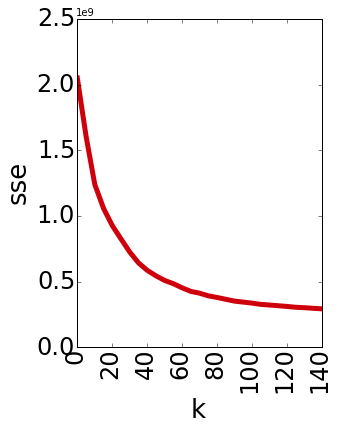

In [395]:
fig, ax = plt.subplots(figsize=(4, 6))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

plt.plot(np.arange(0, len(sse_list)*5, 5), sse_list, color='#ce000c', linewidth=5)

plt.ylabel('sse', fontsize=26)
plt.xlabel('k', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlim([0, 140])
plt.xticks(np.arange(0, 160, 20), np.arange(0, 160, 20), rotation=90, fontsize=24)

path_plot = './'
plt.savefig(path_plot + 'col_clust_k.png', format='png', bbox_inches='tight')